<a href="https://colab.research.google.com/github/soumabkargit/Extract_Text_Image/blob/master/TesseractMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tesseract installation**

[https://github.com/tesseract-ocr/tesseract/wiki](https://)


In [ ]:
!pip install tesseract-ocr
!pip install pytesseract

##Importing all useful dependencies

In [10]:
from matplotlib.image import imread
import numpy as np
from matplotlib import pyplot as plt
import os
import pytesseract
from pytesseract import Output
import matplotlib.patches as patches
from PIL import Image
import re
from pathlib import Path
from shutil import copyfile
# Technically not necessary in newest versions of jupyter
%matplotlib inline

##Dataset

https://expressexpense.com/blog/free-receipt-images-ocr-machine-learning-dataset/

## Reading of all invoice images and extraction of the total amount.

##Sort extracted and non-extracted images into respective folders.

Creation of the directory image_extract failed
Creation of the directory image_NO_extract failed


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

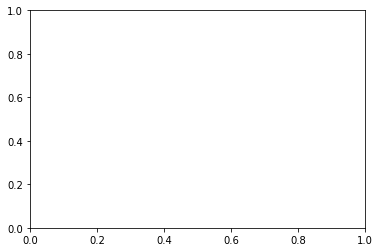

In [11]:
receipt_ocr = {}
total_invoice_good_info = {}
total_invoice_bad_info = {}
all_total_invoice_info = {}

def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

def createFolder(path):
  try:
    os.mkdir(path)
  except OSError:
    print ("Creation of the directory %s failed" % path)
  else:
    print ("Successfully created the directory %s " % path)

candidat_word_total = []
list_candidat_word_total = []

list_files = os.listdir('data_image')
image_extract_path = "image_extract"
image_NO_extract_path = "image_NO_extract"

createFolder(image_extract_path)
createFolder(image_NO_extract_path)

for image_filename in list_files:
  im = np.array(Image.open('data_image'+'/'+image_filename), dtype=np.uint8)
  # Create figure and axes
  fig,ax = plt.subplots(1)
  receipt_ocr = {}
  extracted_text = pytesseract.image_to_string(im, lang = 'eng')
  splits = extracted_text.splitlines()
  list_word_total = []

  for line in splits:
    if re.search(r'TOTAL',line):
      list_word_total.append(line)

  for el in list_word_total:
    if hasNumbers(el):
      candidat_word_total.append(el)
      copyfile('data_image'+'/'+image_filename, image_extract_path+'/'+image_filename)
      print(el)
      total_invoice_good_info[image_filename] = {image_filename : image_filename, 'total': ''+el}
      all_total_invoice_info[image_filename] = {image_filename : image_filename, 'total': ''+el}
    else:
        copyfile('data_image'+'/'+image_filename, image_NO_extract_path+'/'+image_filename)
        total_invoice_bad_info[image_filename] = {image_filename : image_filename, 'total' : 'to be defined'}
        all_total_invoice_info[image_filename] = {image_filename : image_filename, 'total' : 'to be defined'}

print('********** list_candidat_word_total ***********************************') 
list_candidat_word_total.append(candidat_word_total)
list_candidat_word_total  
print('************ all_total_invoice_info ***********************************')
all_total_invoice_info 
print('************ total_invoice_good_info **********************************')
total_invoice_good_info
print('************* total_invoice_bad_info **********************************')
total_invoice_bad_info

##Reading an invoice image and extracting the total amount

{'info': {'invoice_name': '1103-receipt.jpg', 'total': 'TOTAL. $1IS.03'}}

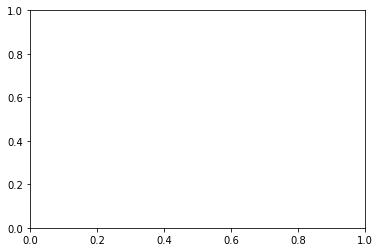

In [ ]:
total_invoice_good_info = {}

def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)
candidat_word_total = []
list_candidat_word_total = []

im = np.array(Image.open('data/1004-receipt.jpg'), dtype=np.uint8)
# Create figure and axes
fig,ax = plt.subplots(1)
receipt_ocr = {}
extracted_text = pytesseract.image_to_string(im, lang = 'eng')
splits = extracted_text.splitlines()
list_word_total = []
for line in splits:
  if re.search(r'TOTAL',line):
    list_word_total.append(line)
  
for el in list_word_total:
  if hasNumbers(el):
    total_invoice_good_info['info'] = {'invoice_name' : image_filename, 'total' : el}
    candidat_word_total.append(el)
    
candidat_word_total     
total_invoice_good_info

#References

https://nanonets.com/blog/receipt-ocr/?fbclid=IwAR0H4VkHhpimqKIgEUQOUCOJS1mtk6vQREcv3MMiqJ2NpxG9LHZnsHM-aeE